# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

from concurrent.futures import ThreadPoolExecutor, as_completed


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

## Config

In [3]:
# Configuration Details for openweather API.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

## Function to get stats for a city, using above config details  
def getCityStats(qurl, city):
    try:
        cstats = {}
        response = requests.get(qurl + city).json()
        cstats['city'] = city
        cstats['lat'] = response['coord']['lat']
        cstats['temp'] = response['main']['temp']
        cstats['humidity'] = response['main']['humidity']
        cstats['cloudiness'] = response['clouds']['all']
        cstats['windspeed'] = response['wind']['speed']
        return cstats
    except KeyError:
        e = f"{city} \n City not found. Skipping..."
        return e
    
# This runner will output a list of dictionaries, using the city stat getter
# This runnder uses a configurable worker setting, to allow for better speed.  
# I have tested it with 5 workers, and it is much faster, However .....
# BE CAREFUL! OpenWeather API limits you. You will get key errors if you reach your limit.
def runner(searchlist):
    threads = []
    cstat_list = []
    nitems = len(searchlist)
    with ThreadPoolExecutor(max_workers=3) as executor:
        counter = 0 
        for city in searchlist:
            threads.append(executor.submit(getCityStats, query_url, city))
            
        for task in as_completed(threads):
            counter = counter+1
            outtext = f"Processing Record {counter} of {nitems} | "
            rs = task.result()
            if type(rs) is dict:
                cstat_list.append(rs)
                print(outtext, rs['city'])
            else:
                print(outtext, task.result())
    print(len(cstat_list), "Successfully Collected")            
    return cstat_list

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Test Check to validate connectivity and reponse format
print(getCityStats(query_url, cities[1]))

{'city': 'misratah', 'lat': 32.3754, 'temp': 67.82, 'humidity': 66, 'cloudiness': 97, 'windspeed': 7.81}


In [5]:
# Make the call and put into datafrom             
citidata = runner(cities)


Processing Record 1 of 606 |  vao
Processing Record 2 of 606 |  misratah
Processing Record 3 of 606 |  butaritari
Processing Record 4 of 606 |  lompoc
Processing Record 5 of 606 |  kavaratti
Processing Record 6 of 606 |  khandyga
Processing Record 7 of 606 |  nikolskoye
Processing Record 8 of 606 |  salisbury
Processing Record 9 of 606 |  raymondville
Processing Record 10 of 606 |  busselton
Processing Record 11 of 606 |  rikitea
Processing Record 12 of 606 |  hihifo 
 City not found. Skipping...
Processing Record 13 of 606 |  bluff
Processing Record 14 of 606 |  mataura
Processing Record 15 of 606 |  new norfolk
Processing Record 16 of 606 |  mar del plata
Processing Record 17 of 606 |  bengkulu
Processing Record 18 of 606 |  nome
Processing Record 19 of 606 |  auki
Processing Record 20 of 606 |  kushima
Processing Record 21 of 606 |  albany
Processing Record 22 of 606 |  talnakh
Processing Record 23 of 606 |  hobart
Processing Record 24 of 606 |  qaanaaq
Processing Record 25 of 606 |

Processing Record 193 of 606 |  torbay
Processing Record 194 of 606 |  kapaa
Processing Record 195 of 606 |  upata
Processing Record 196 of 606 |  kahului
Processing Record 197 of 606 |  lockhart
Processing Record 198 of 606 |  jizan
Processing Record 199 of 606 |  gamba
Processing Record 200 of 606 |  sao jose da coroa grande
Processing Record 201 of 606 |  elizabeth city
Processing Record 202 of 606 |  thinadhoo
Processing Record 203 of 606 |  longyearbyen
Processing Record 204 of 606 |  kirakira
Processing Record 205 of 606 |  roald
Processing Record 206 of 606 |  luzhou
Processing Record 207 of 606 |  russell
Processing Record 208 of 606 |  bauru
Processing Record 209 of 606 |  meulaboh
Processing Record 210 of 606 |  vaitupu 
 City not found. Skipping...
Processing Record 211 of 606 |  shu
Processing Record 212 of 606 |  ambulu
Processing Record 213 of 606 |  schwabisch gmund
Processing Record 214 of 606 |  grand river south east 
 City not found. Skipping...
Processing Record 215

Processing Record 382 of 606 |  sabang
Processing Record 383 of 606 |  jumla
Processing Record 384 of 606 |  bethel
Processing Record 385 of 606 |  sarhari
Processing Record 386 of 606 |  shimoda
Processing Record 387 of 606 |  williams lake
Processing Record 388 of 606 |  camas
Processing Record 389 of 606 |  altamont
Processing Record 390 of 606 |  dujuma 
 City not found. Skipping...
Processing Record 391 of 606 |  narsaq
Processing Record 392 of 606 |  patacamaya
Processing Record 393 of 606 |  porto novo
Processing Record 394 of 606 |  concordia
Processing Record 395 of 606 |  sao joao da barra
Processing Record 396 of 606 |  palkino
Processing Record 397 of 606 |  dunmore town
Processing Record 398 of 606 |  kidal
Processing Record 399 of 606 |  teya
Processing Record 400 of 606 |  cherskiy
Processing Record 401 of 606 |  egvekinot
Processing Record 402 of 606 |  lata
Processing Record 403 of 606 |  soyo
Processing Record 404 of 606 |  paamiut
Processing Record 405 of 606 |  bamb

Processing Record 574 of 606 |  huanren
Processing Record 575 of 606 |  kasangulu
Processing Record 576 of 606 |  kharp
Processing Record 577 of 606 |  broome
Processing Record 578 of 606 |  lagunas
Processing Record 579 of 606 |  sale
Processing Record 580 of 606 |  garowe
Processing Record 581 of 606 |  leh
Processing Record 582 of 606 |  kautokeino
Processing Record 583 of 606 |  turkistan
Processing Record 584 of 606 |  mayumba
Processing Record 585 of 606 |  calinaoan 
 City not found. Skipping...
Processing Record 586 of 606 |  vaitape
Processing Record 587 of 606 |  maniitsoq
Processing Record 588 of 606 |  enem
Processing Record 589 of 606 |  kuryk
Processing Record 590 of 606 |  kenora
Processing Record 591 of 606 |  arona
Processing Record 592 of 606 |  ghanzi
Processing Record 593 of 606 |  gimli
Processing Record 594 of 606 |  sandakan
Processing Record 595 of 606 |  pouso alegre
Processing Record 596 of 606 |  caucaia
Processing Record 597 of 606 |  safranbolu
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
citydatadf = pd.DataFrame(citidata)
citydatadf.to_csv('citydata.csv', index=False)
citydatadf.head(10)

,city,lat,temp,humidity,cloudiness,windspeed
0,vao,-22.6667,74.73,80,1,12.48
1,misratah,32.3754,67.82,66,97,7.81
2,butaritari,3.0707,83.52,77,100,19.13
3,lompoc,34.6391,58.26,82,10,10.36
4,kavaratti,10.5669,85.26,67,82,1.16
5,khandyga,62.6667,45.57,61,100,4.97
6,nikolskoye,59.7035,40.33,87,75,8.95
7,salisbury,51.0693,35.74,87,90,4.61
8,raymondville,26.4815,73.62,88,90,10.36
9,busselton,-33.6500,60.28,98,45,3.27


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
citydatadf.describe()
## Use MAX to see if there are any over 100.

,lat,temp,humidity,cloudiness,windspeed
count,563.000000,563.000000,563.000000,563.000000,563.000000
mean,22.091701,60.292114,71.424512,57.682060,7.442469
std,33.017061,17.730608,21.555339,39.488998,5.130422
min,-54.800000,9.720000,1.000000,0.000000,0.250000
25%,-5.337400,46.310000,63.000000,18.000000,3.655000
50%,28.872400,62.600000,77.000000,75.000000,6.150000
75%,48.659250,75.055000,87.000000,98.000000,9.955000
max,78.218600,89.600000,100.000000,100.000000,39.950000


In [8]:
# Another way, Return rows with humidity greater than 100.
hundredpluscitiesdf = citydatadf[citydatadf['humidity'] <= 100]

In [9]:
#  Get the indices of cities that have humidity over 100%.
citydatadf.index[citydatadf['humidity'] > 100].tolist()

[]

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = citydatadf[citydatadf['humidity'] <= 100]
clean_city_data.head()

,city,lat,temp,humidity,cloudiness,windspeed
0,vao,-22.6667,74.73,80,1,12.48
1,misratah,32.3754,67.82,66,97,7.81
2,butaritari,3.0707,83.52,77,100,19.13
3,lompoc,34.6391,58.26,82,10,10.36
4,kavaratti,10.5669,85.26,67,82,1.16


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

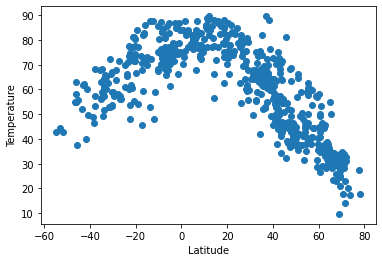

In [11]:
 # Create a Scatter Plot for temperature vs latitude
x_values = clean_city_data['lat']
y_values = clean_city_data['temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

## Latitude vs. Humidity Plot

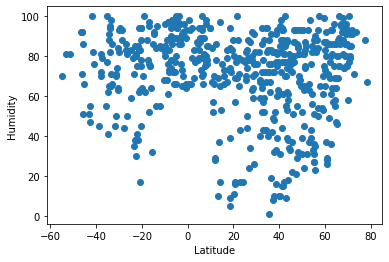

In [12]:
 # Create a Scatter Plot for temperature vs latitude
x_values = clean_city_data['lat']
y_values = clean_city_data['humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

## Latitude vs. Cloudiness Plot

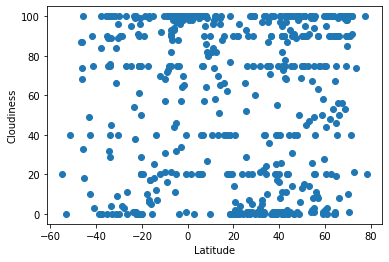

In [13]:
 # Create a Scatter Plot for temperature vs latitude
x_values = clean_city_data['lat']
y_values = clean_city_data['cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

## Latitude vs. Wind Speed Plot

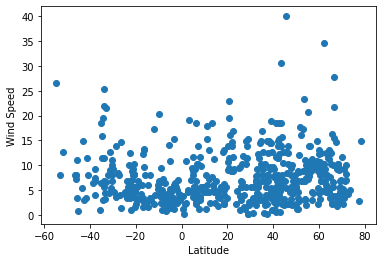

In [14]:
 # Create a Scatter Plot for temperature vs latitude
x_values = clean_city_data['lat']
y_values = clean_city_data['windspeed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

## Linear Regression

In [15]:
x_values = clean_city_data['lat']
y_values = clean_city_data['temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      74.221891
1      57.091605
2      66.211858
3      56.387093
4      63.878880
         ...    
558    57.298910
559    64.660232
560    48.348988
561    68.751395
562    50.727281
Name: lat, Length: 563, dtype: float64


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [16]:
northhem_city_data = clean_city_data[clean_city_data['lat'] > 0]

y = -0.85x +90.9
The r-value is: 0.7766314645787329


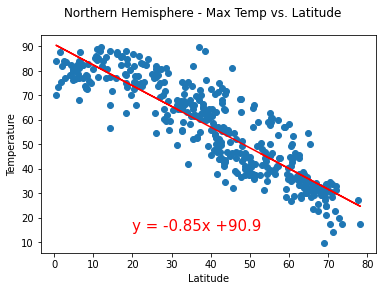

In [17]:
x_values = northhem_city_data['lat']
y_values = northhem_city_data['temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.suptitle('Northern Hemisphere - Max Temp vs. Latitude', fontsize='12')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig("northern-temp-vs-lat.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.59x +80.15
The r-value is: 0.503516993278595


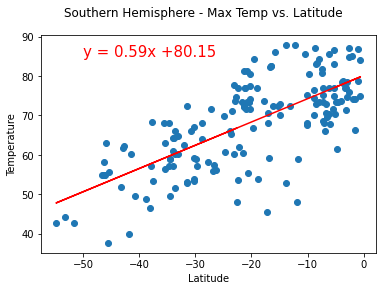

In [18]:
southern_hem_city_data = clean_city_data[clean_city_data['lat'] < 0]
x_values = southern_hem_city_data['lat']
y_values = southern_hem_city_data['temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.suptitle('Southern Hemisphere - Max Temp vs. Latitude', fontsize='12')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig("southern-temp-vs-lat.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.04x +67.3
The r-value is: 0.0011978863527664


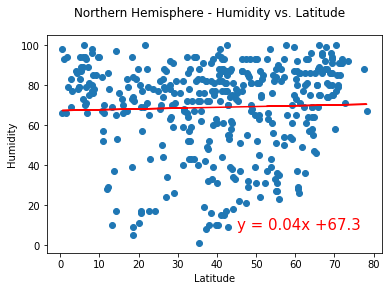

In [19]:
x_values = northhem_city_data['lat']
y_values = northhem_city_data['humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.suptitle('Northern Hemisphere - Humidity vs. Latitude', fontsize='12')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(45,8),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig("northern-humidity-vs-lat.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.28x +83.01
The r-value is: 0.051211814490640384


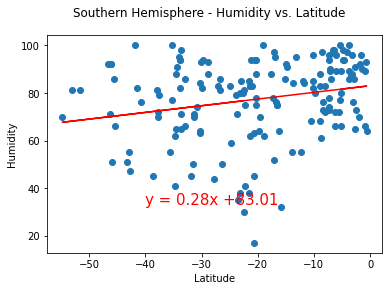

In [20]:
x_values = southern_hem_city_data['lat']
y_values = southern_hem_city_data['humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.suptitle('Southern Hemisphere - Humidity vs. Latitude', fontsize='12')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-40,33),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig("southern-humidity-vs-lat.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.18x +50.45
The r-value is: 0.007808007028255791


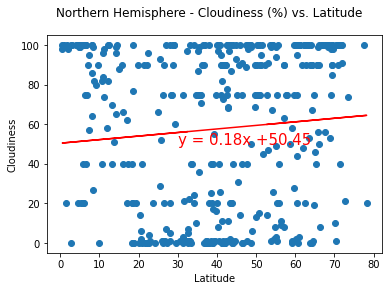

In [21]:
x_values = northhem_city_data['lat']
y_values = northhem_city_data['cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.suptitle('Northern Hemisphere - Cloudiness (%) vs. Latitude', fontsize='12')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(30,50),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig("northern-cloudiness-vs-lat.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.55x +68.8
The r-value is: 0.037718954618820785


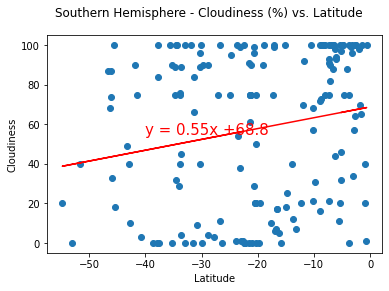

In [22]:
x_values = southern_hem_city_data['lat']
y_values = southern_hem_city_data['cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.suptitle('Southern Hemisphere - Cloudiness (%) vs. Latitude', fontsize='12')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-40,55),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig("southern-cloudiness-vs-lat.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.04x +67.3
The r-value is: 0.0011978863527664


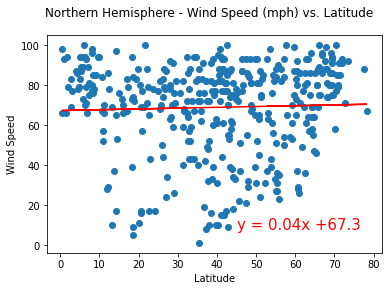

In [23]:
x_values = northhem_city_data['lat']
y_values = northhem_city_data['humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.suptitle('Northern Hemisphere - Wind Speed (mph) vs. Latitude', fontsize='12')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(45,8),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig("northern-windspeed-vs-lat.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.14x +3.76
The r-value is: 0.15017676092116886


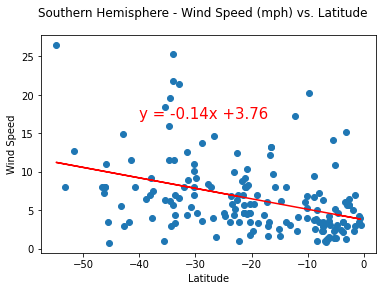

In [24]:
x_values = southern_hem_city_data['lat']
y_values = southern_hem_city_data['windspeed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.suptitle('Southern Hemisphere - Wind Speed (mph) vs. Latitude', fontsize='12')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-40,17),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig("southern-windspeed-vs-lat.png")
plt.show()